# 1. Preprocess the Drive Data

In [1]:
# Install the opencv package
#!pip install opencv-python

In [2]:
import numpy as np
import cv2
import os
import h5py
from PIL import Image

import imageio
import imgaug as ia
from imgaug import augmenters as iaa

In [3]:
# Load the Drive Dataset - training data and testing data
train_img_path = "data/train/images"
train_label_path = "data/train/labels"

test_img_path = "data/test/images"
test_label_path = "data/test/labels"

In [4]:
def preprocess_image(img, img_size=(512, 512)):
    """Preprocesses a single retinal image.

    Args:
        img (numpy.ndarray): The input image.
        img_size (tuple, optional): Desired size for resizing. Defaults to (512, 512).

    Returns:
        numpy.ndarray: The preprocessed image.
    """

    # 1. Grayscale conversion
    if len(img.shape) == 3:  # Color image
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # 2. Normalization 
    img = cv2.normalize(img, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)

    # 3. Resizing
    img = cv2.resize(img, img_size, interpolation=cv2.INTER_AREA)

    return img

def load_and_preprocess(img_path, label_path, img_size=(512, 512)):
    """Loads and preprocesses images and labels from the DRIVE dataset.

    Args:
        img_path (str): Path to the image folder.
        label_path (str): Path to the label folder.
        img_size (tuple, optional): Image size for resizing. Defaults to (512, 512).

    Returns:
        tuple: Two lists containing preprocessed images and labels.
    """ 
    images = []
    labels = []

    for filename in os.listdir(img_path):
        # Load image
        img = cv2.imread(os.path.join(img_path, filename))
        img = preprocess_image(img, img_size)
        images.append(img)

        # Load label
        label = Image.open(os.path.join(label_path, filename))
        label = np.array(label)  # Convert to NumPy array
        label = preprocess_image(label, img_size)  # Ensure same size
        labels.append(label)

    return images, labels

train_images, train_labels = load_and_preprocess(train_img_path, train_label_path)
test_images, test_labels = load_and_preprocess(test_img_path, test_label_path)

In [5]:
import matplotlib.pyplot as plt

def visualize_image_and_label(img, label, figsize=(10, 5)):
    """Displays an image and its corresponding label side-by-side.

    Args:
        img (numpy.ndarray): The image to display.
        label (numpy.ndarray): The corresponding label.
        figsize (tuple, optional): Size of the figure. Defaults to (10, 5).
    """

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)

    ax1.imshow(img, cmap='gray')
    ax1.set_title('Image')
    ax1.axis('off')

    ax2.imshow(label, cmap='gray')
    ax2.set_title('Label')
    ax2.axis('off')

    plt.show()

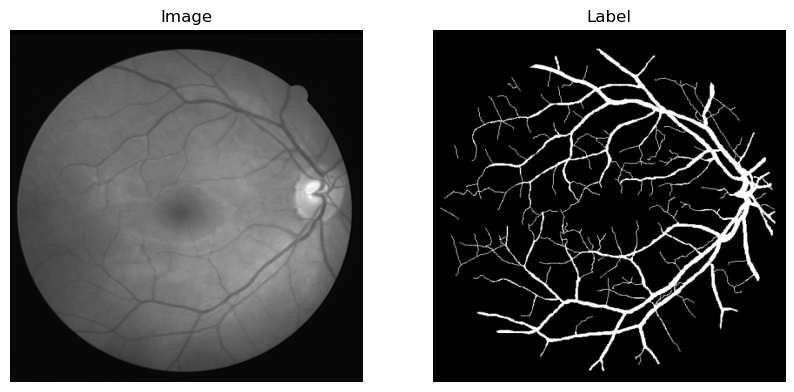

In [6]:
image_index = 0
visualize_image_and_label(train_images[image_index], train_labels[image_index])

# 2. Data Augmentation

In [7]:
#!pip install imgaug

In [8]:
import imageio
import imgaug as ia
from imgaug import augmenters as iaa

## 1. Rotation

In [9]:
def rotation(img, label):
    """Performs rotation augmentation using OpenCV.
    """
    for angle in [30, 60, 90]:
        
        rotate = iaa.Rotate(angle)
        
        img = rotate.augment_image(img)
        label = rotate.augment_image(label)
        
        train_images.append(img)
        train_labels.append(label)

In [10]:
# 0 to 19 from train_images and train_labels are our actual data
for i in range(20):
    rotation(train_images[i], train_labels[i])
    
len(train_images), len(train_labels)

(80, 80)

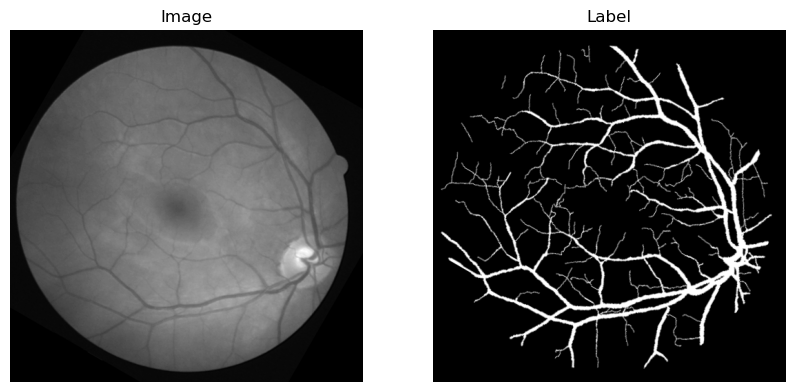

In [11]:
image_index = 20 # It should be 30 degrees rotation of 1st image
visualize_image_and_label(train_images[image_index], train_labels[image_index])

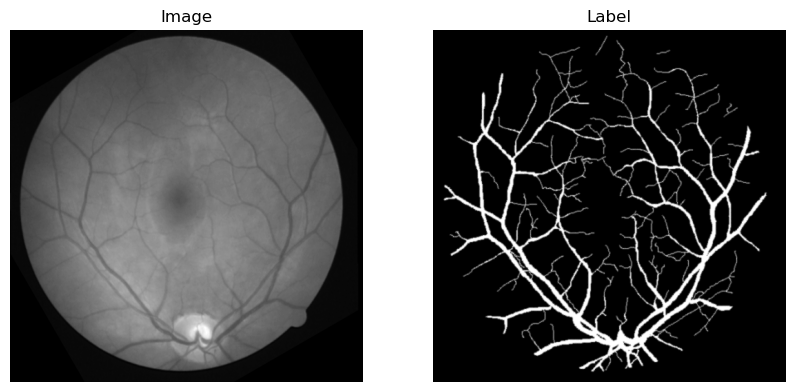

In [12]:
image_index = 21 # It should be 60 degrees rotation of 1st image
visualize_image_and_label(train_images[image_index], train_labels[image_index])

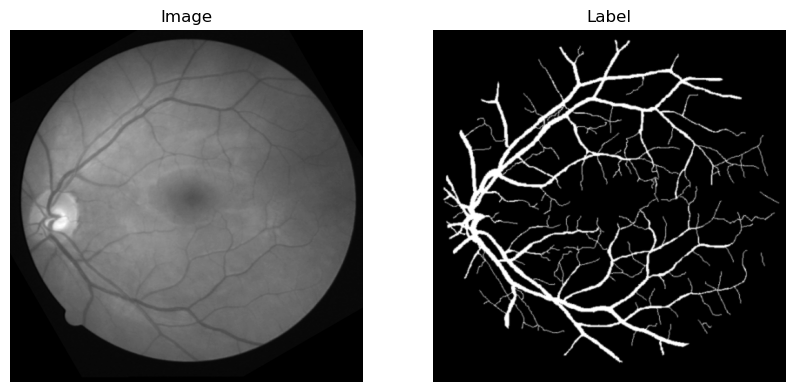

In [13]:
image_index = 22 # It should be 90 degrees rotation of 1st image
visualize_image_and_label(train_images[image_index], train_labels[image_index])

## Compression

In [14]:
def compression(img, label):
    
    # Change it to normal size before applying jpeg comnpression
    img_255 = cv2.normalize(img, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
    
    for quality in [20, 50, 75]:

        aug = ia.augmenters.JpegCompression(compression=quality)
        
        compressed_img = aug.augment_image(img_255)
        
        # Normalize the data
        img = cv2.normalize(compressed_img, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
        train_images.append(img)
        
        # No need to compress the label
        train_labels.append(label)

In [15]:
# 0 to 19 from train_images and train_labels are our actual data
for i in range(20):
    compression(train_images[i], train_labels[i])

len(train_images), len(train_labels)

(140, 140)

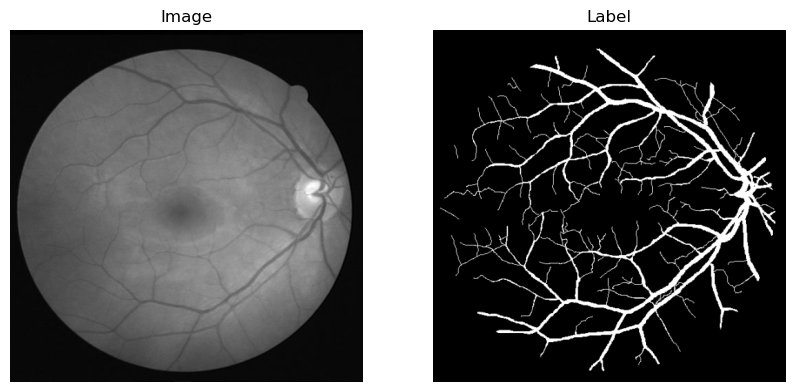

In [16]:
image_index = 80 # It should be 1st image jpeg compression 20
visualize_image_and_label(train_images[image_index], train_labels[image_index])

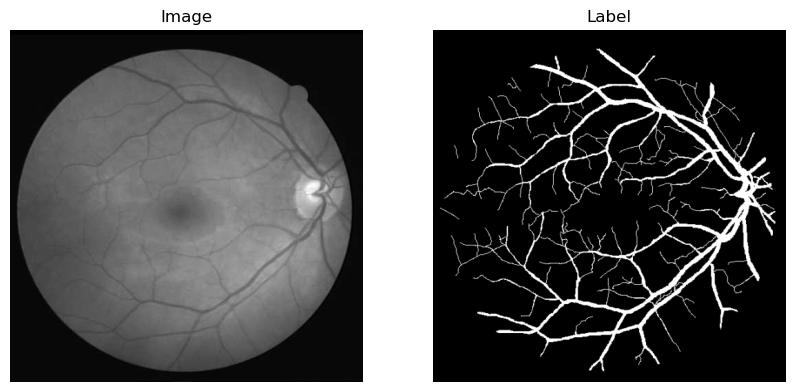

In [17]:
image_index = 81 # It should be 1st image jpeg compression 50
visualize_image_and_label(train_images[image_index], train_labels[image_index])

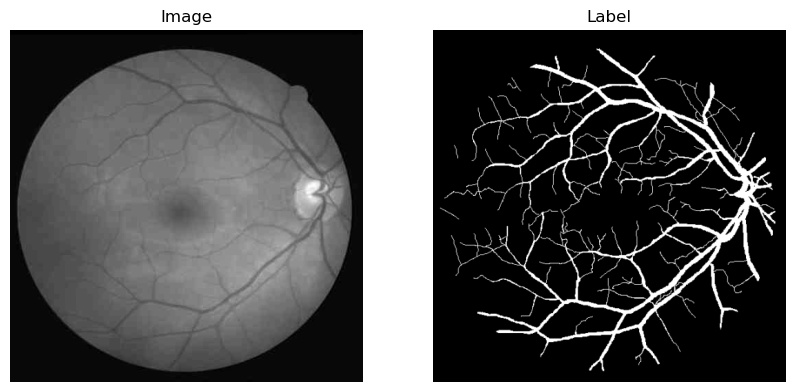

In [18]:
image_index = 82 # It should be 1st image jpeg compression 75
visualize_image_and_label(train_images[image_index], train_labels[image_index])

## Zoom In/Out

In [19]:
def zoom(img, label):
    """
    Applies zoom in or out to the image and label.
    Args:
        img (numpy.ndarray): The input image.
        label (numpy.ndarray): The corresponding label.
        zoom_factor (float): The factor by which to zoom. >1 for zoom in, <1 for zoom out.
    """
    
    
    for zoom_factor in [0.8, 1.2]:
        zoom = iaa.Affine(scale={"x": (zoom_factor), "y": (zoom_factor)})
        zoom_img = zoom.augment_image(img)
        zoom_label = zoom.augment_image(label)
        
        train_images.append(zoom_img)
        train_labels.append(zoom_label)

In [20]:
# 0 to 19 from train_images and train_labels are our actual data
for i in range(20):
    zoom(train_images[i], train_labels[i])
    
len(train_images), len(train_labels)

(180, 180)

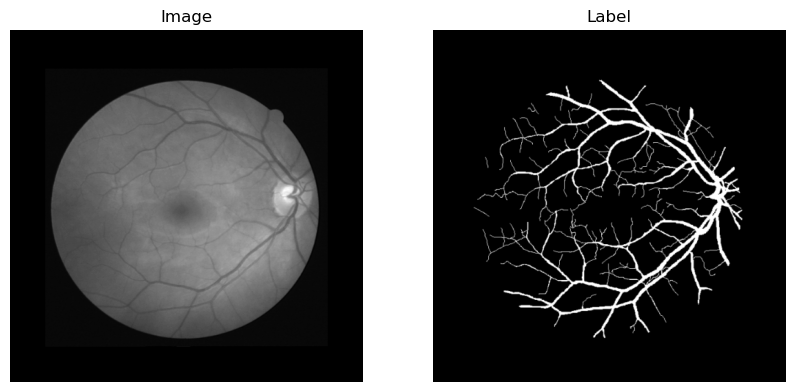

In [21]:
image_index = 140 # It should be 1st image with zoom_factor 0.8 i.e., zoom out
visualize_image_and_label(train_images[image_index], train_labels[image_index])

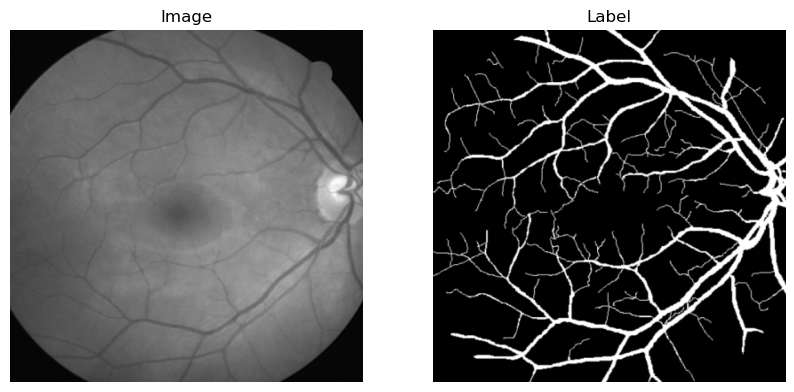

In [22]:
image_index = 141  # It should be 1st image with zoom_factor 1.2 i.e., zoom in
visualize_image_and_label(train_images[image_index], train_labels[image_index])

## Shear X/Y

In [23]:
def shear(img, label, shear_factor=0.2):
    """
    Applies shear transformation to the image and label.
    Args:
        img (numpy.ndarray): The input image.
        label (numpy.ndarray): The corresponding label.
        shear_factor (float): The factor by which to shear. Positive for right, negative for left direction.
    """
    
    # Shear in X axis
    
    # Define the shear augmentation for the X-axis
    shear = iaa.ShearX(shear_factor * 100)  # imgaug uses percentage, hence multiply by 100
    
    # Apply the augmentation
    sheared_img = shear.augment_image(img)
    sheared_label = shear.augment_image(label)
    
    # Add the augmented images to the training set
    train_images.append(sheared_img)
    train_labels.append(sheared_label)
    
    # Shear in Y axis
    
    # Define the shear augmentation for the Y-axis
    shear = iaa.ShearY(shear_factor * 100)  # imgaug uses percentage, hence multiply by 100
    
    # Apply the augmentation
    sheared_img = shear.augment_image(img)
    sheared_label = shear.augment_image(label)
    
    # Add the augmented images to the training set
    train_images.append(sheared_img)
    train_labels.append(sheared_label)

In [24]:
# 0 to 19 from train_images and train_labels are our actual data
for i in range(20):
    shear(train_images[i], train_labels[i])
len(train_images), len(train_labels)

(220, 220)

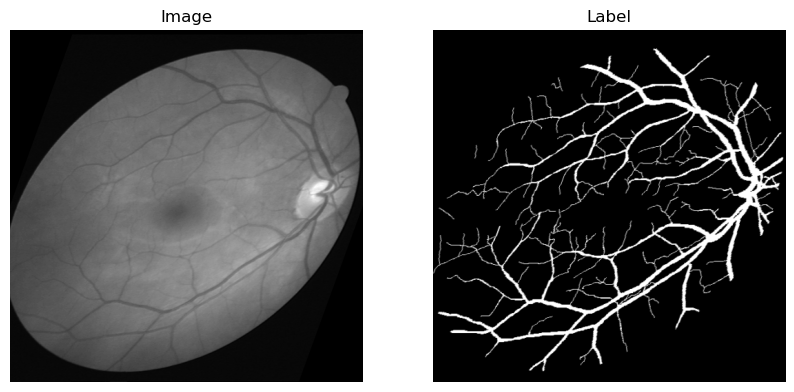

In [25]:
image_index = 180 # It should be shear image of 1st image in X-axis with shear_factor of 0.2
visualize_image_and_label(train_images[image_index], train_labels[image_index])

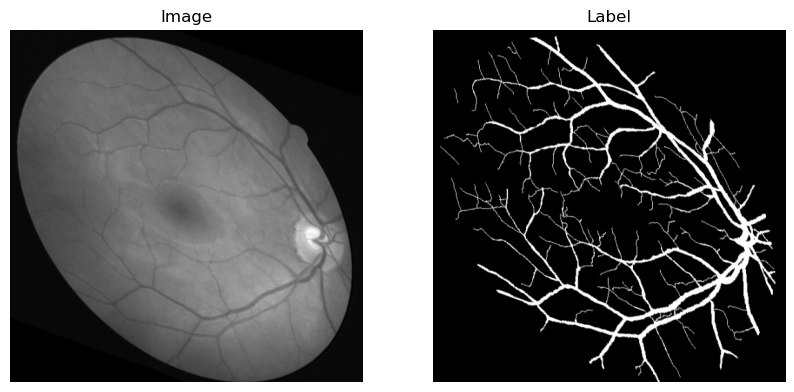

In [26]:
image_index = 181 # It should be shear image of 1st image in Y-axis with shear_factor of 0.2
visualize_image_and_label(train_images[image_index], train_labels[image_index])

## Contrast

In [27]:
#!pip install imagecorruptions

In [28]:
def corrupt_contrast(img, label):
    """
    Simulates contrast corruption on the image using imgaug.
    Args:
        img (numpy.ndarray): The input image.
        label (numpy.ndarray): The corresponding label.
        severity (int): The severity of the corruption. Should be an integer in [1, 5].
    """
    
    # Convert the image from float32 back to uint8
    img_uint8 = np.clip(img * 255, 0, 255).astype(np.uint8)
    
    for severity in [3, 5]:

        # Define the contrast corruption augmentation with higher severity for debugging
        contrast_aug = iaa.imgcorruptlike.Contrast(severity=severity)

        # Apply the augmentation to the image only, not the label
        corrupted_img = contrast_aug.augment_image(img_uint8)

        # Convert corrupted image back to float32 and normalize
        corrupted_img_float = np.clip(corrupted_img / 255.0, 0, 1).astype(np.float32)

        # Add the augmented image and the original label to the training set for demonstration
        train_images.append(corrupted_img_float)
        train_labels.append(label)  # Labels are not affected by contrast changes

In [29]:
# 0 to 19 from train_images and train_labels are our actual data
for i in range(20):
    corrupt_contrast(train_images[i], train_labels[i])
len(train_images), len(train_labels)

(260, 260)

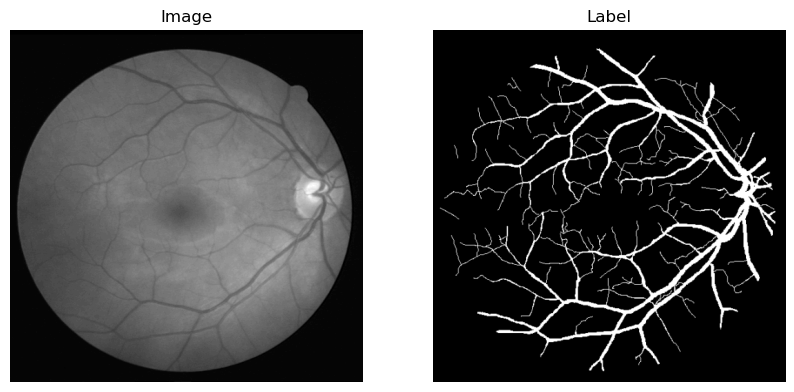

In [30]:
image_index = 220 # 1st image contast by severity = 3
visualize_image_and_label(train_images[image_index], train_labels[image_index])

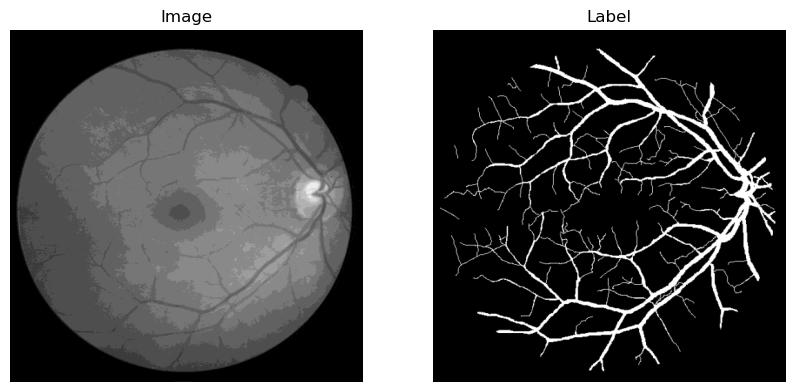

In [31]:
image_index = 221 # 1st image contast by severity = 5
visualize_image_and_label(train_images[image_index], train_labels[image_index])

## Shift X/Y

In [32]:
def shift(img, label):
    
    # shift amount = - 100 pixel
    
    shift_amount = -100
    ia_x = iaa.TranslateX(px=(shift_amount))
    
    shift_x_img = ia_x.augment_image(img)
    shift_x_label = ia_x.augment_image(label)
    
    train_images.append(shift_x_img)
    train_labels.append(shift_x_label)
    
    ia_y = iaa.TranslateY(px=(shift_amount))
    
    shift_y_img = ia_y.augment_image(img)
    shift_y_label = ia_y.augment_image(label)
    
    train_images.append(shift_y_img)
    train_labels.append(shift_y_label)

In [33]:
# 0 to 19 from train_images and train_labels are our actual data
for i in range(20):
    shift(train_images[i], train_labels[i])
len(train_images), len(train_labels)

(300, 300)

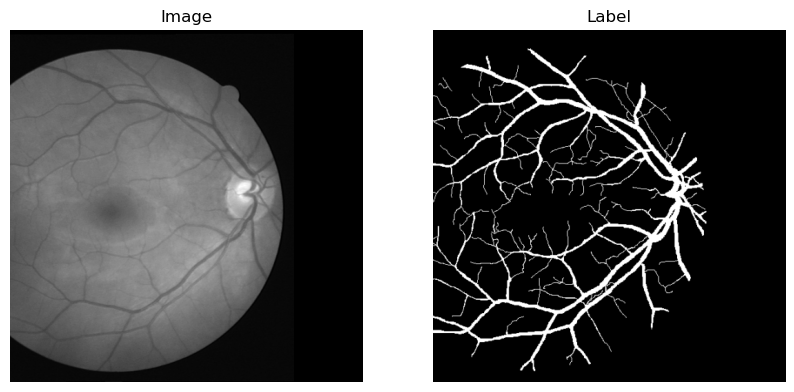

In [34]:
image_index = 260 # 1st image that shifts in x
visualize_image_and_label(train_images[image_index], train_labels[image_index])

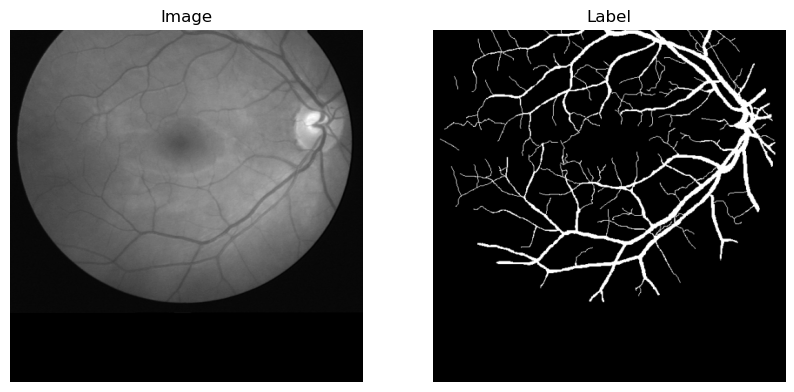

In [35]:
image_index = 261 # 1st image that shifts in y
visualize_image_and_label(train_images[image_index], train_labels[image_index])

### Albumentations

In [36]:
#!pip install albumentations

In [37]:
import albumentations as A
from albumentations.core.composition import Compose

def albumentations_augment(image, label):
    """
    Applies a series of Albumentations augmentations to both the image and its corresponding label.
    """
    transform = Compose([
        A.HorizontalFlip(p=0.5),
        A.RandomBrightnessContrast(p=0.5),
        A.CLAHE(p=0.5),
        A.Rotate(limit=45, p=0.5),
        A.ElasticTransform(p=0.5),
        A.GridDistortion(p=0.5),
        A.OpticalDistortion(distort_limit=2, shift_limit=0.5, p=0.5)
    ])

    augmented = transform(image=image, mask=label)
    augmented_img = augmented['image']
    augmented_label = augmented['mask']

    return augmented_img, augmented_label


In [38]:
# Apply Albumentations augmentations to your dataset
for i in range(20):  # Assuming the first 20 are your original dataset
    img, label = train_images[i], train_labels[i]
    img_uint8 = np.clip(img * 255, 0, 255).astype(np.uint8)  # Convert to uint8
    label_uint8 = np.clip(label * 255, 0, 255).astype(np.uint8)
    
    augmented_img, augmented_label = albumentations_augment(img_uint8, label_uint8)
    
    # Convert back to float32 and normalize if necessary
    augmented_img = np.clip(augmented_img / 255.0, 0, 1).astype(np.float32)
    augmented_label = np.clip(augmented_label / 255.0, 0, 1).astype(np.float32)
    
    train_images.append(augmented_img)
    train_labels.append(augmented_label)

# Now check the length to ensure augmentations were added
print(len(train_images), len(train_labels))

320 320


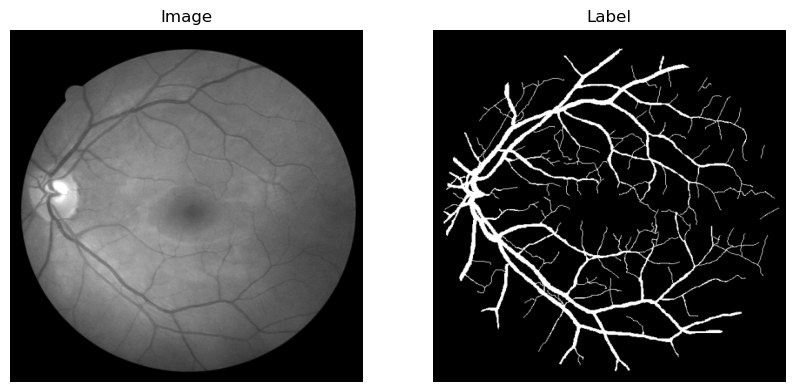

In [39]:
# Some Albumentations
image_index = 300
visualize_image_and_label(train_images[image_index], train_labels[image_index])

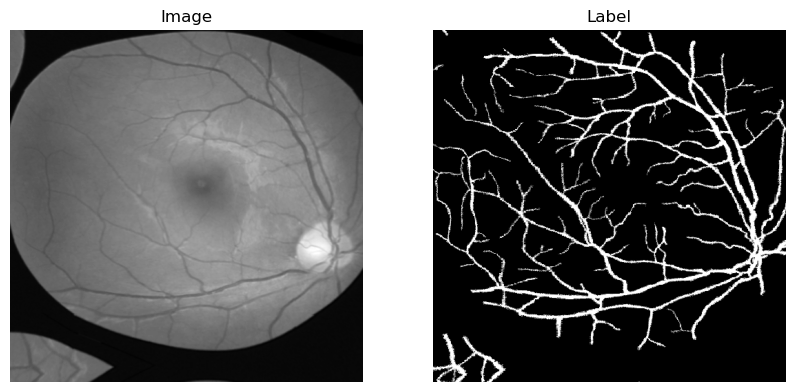

In [40]:
image_index = 305
visualize_image_and_label(train_images[image_index], train_labels[image_index])

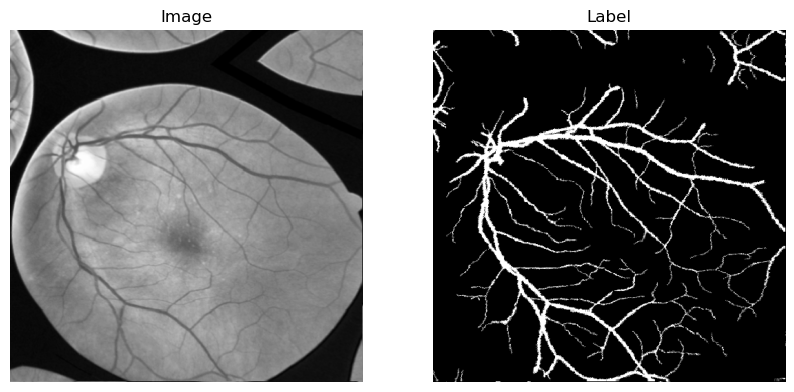

In [41]:
image_index = 310
visualize_image_and_label(train_images[image_index], train_labels[image_index])

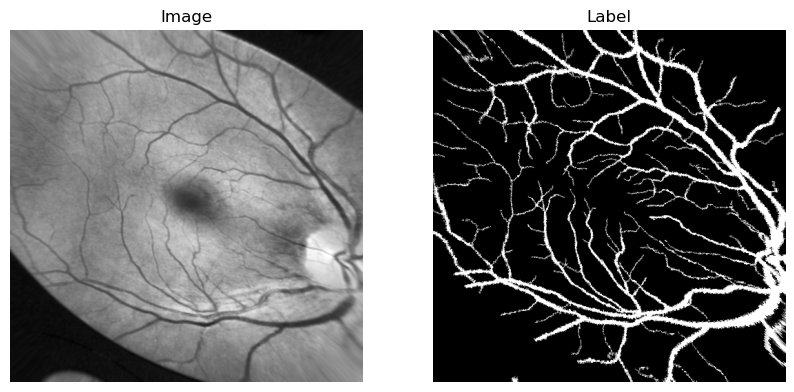

In [42]:
image_index = 315
visualize_image_and_label(train_images[image_index], train_labels[image_index])

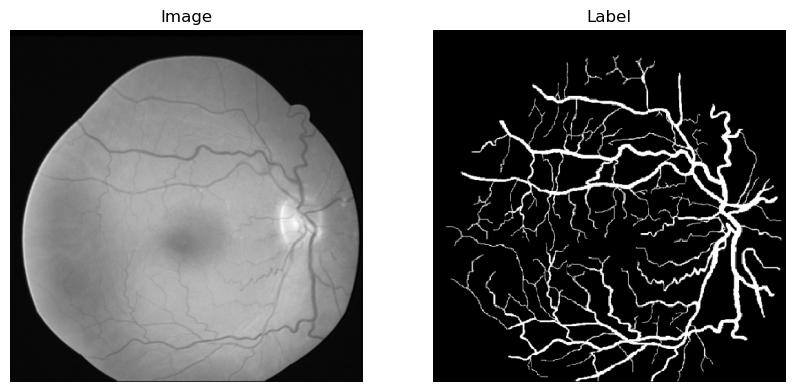

In [43]:
image_index = 319
visualize_image_and_label(train_images[image_index], train_labels[image_index])

**Finally, All the images are stored in train_images and corresponding segemented labels are in train_labels**

In [44]:
len(train_images), len(train_labels)

(320, 320)

In [45]:
train_images[0].shape, train_labels[0].shape

((512, 512), (512, 512))

In [46]:
len(test_images), len(test_labels)

(20, 20)

In [47]:
test_images[0].shape, test_labels[0].shape

((512, 512), (512, 512))

# 3. Modeling Using U-Net Architecture

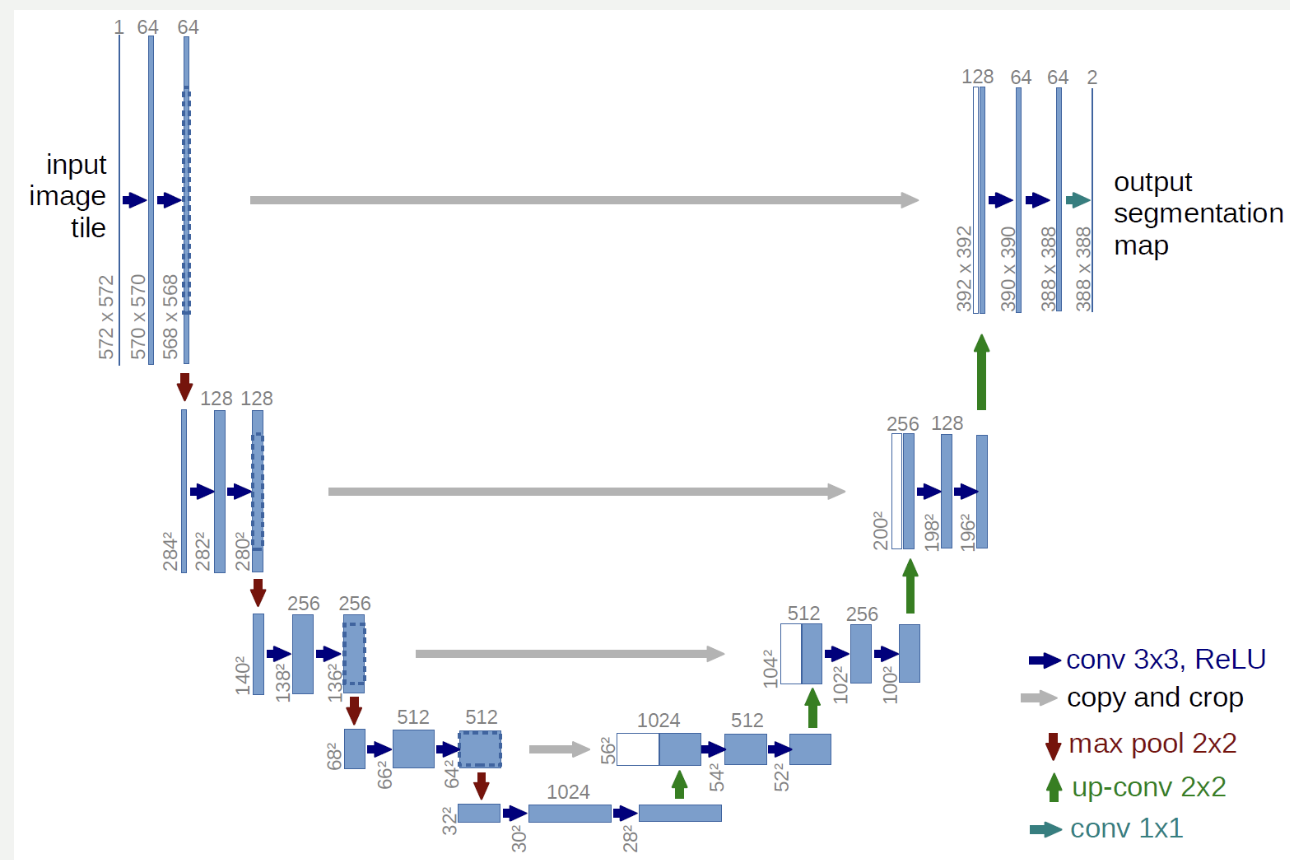

In [48]:
#!pip install tensorflow

In [49]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dropout, Conv2DTranspose, concatenate

In [50]:
def unet_model(input_size=(512, 512, 1)):
    inputs = Input(input_size)
    
    # Contracting Path
    c1 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(inputs)
    c1 = Dropout(0.1)(c1)
    c1 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
    p1 = MaxPooling2D((2, 2))(c1)

    c2 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
    c2 = Dropout(0.1)(c2)
    c2 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
    p2 = MaxPooling2D((2, 2))(c2)

    # Bottleneck
    c5 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
    c5 = Dropout(0.2)(c5)
    c5 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)

    # Expansive Path
    u6 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c5)
    u6 = concatenate([u6, c2])
    c6 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
    c6 = Dropout(0.2)(c6)
    c6 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)

    u7 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c6)
    u7 = concatenate([u7, c1], axis=3)
    c7 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
    c7 = Dropout(0.2)(c7)
    c7 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)

    outputs = Conv2D(1, (1, 1), activation='sigmoid')(c7)
    
    model = Model(inputs=[inputs], outputs=[outputs])
    return model

# Create the U-Net model
model = unet_model()

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 512, 512, 1)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 512, 512, 16)         160       ['input_1[0][0]']             
                                                                                                  
 dropout (Dropout)           (None, 512, 512, 16)         0         ['conv2d[0][0]']              
                                                                                                  
 conv2d_1 (Conv2D)           (None, 512, 512, 16)         2320      ['dropout[0][0]']             
                                                                                              

In [51]:
# Convert lists to numpy arrays for training

train_images_np = np.array(train_images).reshape(-1, 512, 512, 1)  # Add channel dimension
train_labels_np = np.array(train_labels).reshape(-1, 512, 512, 1)  # Add channel dimension

test_images_np = np.array(test_images).reshape(-1, 512, 512, 1)
test_labels_np = np.array(test_labels).reshape(-1, 512, 512, 1)

In [52]:
# Train the model
history = model.fit(
    train_images_np, train_labels_np,
    validation_split=0.1,  # Optionally, set aside a fraction of the training data for validation
    epochs= 4,  # Number of epochs to train for
    batch_size= 4  # Batch size
)

Epoch 1/4
72/72 [==============================] - 141s 2s/step - loss: 0.3187 - accuracy: 0.8557 - val_loss: 0.2632 - val_accuracy: 0.8742
Epoch 2/4
72/72 [==============================] - 158s 2s/step - loss: 0.2538 - accuracy: 0.8561 - val_loss: 0.2271 - val_accuracy: 0.8745
Epoch 3/4
72/72 [==============================] - 20035s 282s/step - loss: 0.2148 - accuracy: 0.8635 - val_loss: 0.2087 - val_accuracy: 0.8831
Epoch 4/4
72/72 [==============================] - 20780s 293s/step - loss: 0.1877 - accuracy: 0.8708 - val_loss: 0.1786 - val_accuracy: 0.8898


In [53]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_images_np, test_labels_np)
print(f"Test loss: {test_loss}, Test accuracy: {test_accuracy}")

1/1 [==============================] - 2s 2s/step - loss: 0.1415 - accuracy: 0.9060
Test loss: 0.14152278006076813, Test accuracy: 0.9059869647026062


1/1 [==============================] - 2s 2s/step


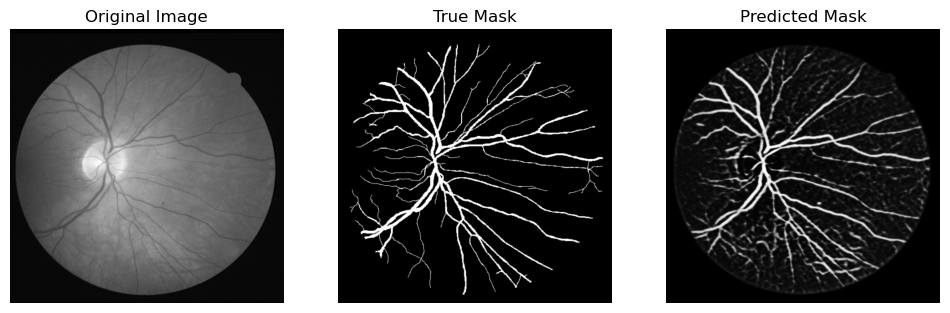

In [58]:
# Make predictions
predictions = model.predict(test_images_np)

# Optionally, visualize some predictions
n = 3  # Index of the image to visualize
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(test_images_np[n].reshape(512, 512), cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(test_labels_np[n].reshape(512, 512), cmap='gray')
plt.title("True Mask")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(predictions[n].reshape(512, 512), cmap='gray')
plt.title("Predicted Mask")
plt.axis('off')

plt.show()
